**🔑 What this script does:**

Download GEO dataset using GEOparse (GSE IDs, e.g., GSE57691).

Extract expression matrix from samples.

Perform exploratory data analysis (boxplots, summary).

Run a basic differential expression test (t-test).

Create a volcano plot of results.

In [1]:
# Install GEOparse first if not installed
!pip install GEOparse

import GEOparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 1: Download GEO dataset (example: GSE57691)
gse_id = "GSE57691"   # Replace with any GEO Series ID
gse = GEOparse.get_GEO(geo=gse_id, destdir=".")

print(f"Title: {gse.metadata['title'][0]}")
#print(f"Organism: {gse.metadata['organism_ch1'][0]}")
print(f"Number of samples: {len(gse.gsms)}")

10-Sep-2025 16:16:54 DEBUG utils - Directory . already exists. Skipping.
DEBUG:GEOparse:Directory . already exists. Skipping.
10-Sep-2025 16:16:54 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
10-Sep-2025 16:16:54 INFO GEOparse - Parsing ./GSE57691_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE57691_family.soft.gz: 
10-Sep-2025 16:16:54 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
10-Sep-2025 16:16:54 DEBUG GEOparse - SERIES: GSE57691
DEBUG:GEOparse:SERIES: GSE57691
10-Sep-2025 16:16:54 DEBUG GEOparse - PLATFORM: GPL10558
DEBUG:GEOparse:PLATFORM: GPL10558
10-Sep-2025 16:16:56 DEBUG GEOparse - SAMPLE: GSM1386783
DEBUG:GEOparse:SAMPLE: GSM1386783
10-Sep-2025 16:16:56 DEBUG GEOparse - SAMPLE: GSM1386784
DEBUG:GEOparse:SAMPLE: GSM1386784
10-Sep-2025 16:16:56 DEBUG GEOparse - SAMPLE: GSM1386785
DEBUG:GEOparse:SAMPLE: GSM1386785
10-Sep-2025 16:16:57 DEBUG GEOparse - SAMPLE: GSM1386786
DEBUG:GEOparse:SAMP

Title: Differential gene expression in human abdominal aortic aneurysm and atherosclerosis
Number of samples: 68


In [6]:
# Step 2: Extract expression data
sample_ids = list(gse.gsms.keys())
print("Sample IDs:", sample_ids[:5])  # show first 5 samples

# Convert sample table to DataFrame
dfs = []
for gsm_name, gsm in gse.gsms.items():
    if gsm.table is not None and "VALUE" in gsm.table.columns:
        df = gsm.table[["ID_REF", "VALUE"]].copy()
        df.rename(columns={"VALUE": gsm_name}, inplace=True)
        dfs.append(df)

# Merge all samples into one big DataFrame
expr_df = dfs[0]
for df in dfs[1:]:
    expr_df = expr_df.merge(df, on="ID_REF")

expr_df.set_index("ID_REF", inplace=True)

print("Expression Matrix Shape:", expr_df.shape)
print(expr_df.head())



Sample IDs: ['GSM1386783', 'GSM1386784', 'GSM1386785', 'GSM1386786', 'GSM1386787']
Expression Matrix Shape: (39426, 68)
              GSM1386783  GSM1386784  GSM1386785  GSM1386786  GSM1386787  \
ID_REF                                                                     
ILMN_1802380    0.329617    0.213935   -0.068321    0.303878    0.483916   
ILMN_1893287    0.222914   -1.097718    0.314406   -1.213974   -1.416876   
ILMN_1736104    0.247965   -1.185865    0.347580   -1.140966   -1.183993   
ILMN_1792389    0.282643   -0.793925    0.110410   -0.961727   -0.102612   
ILMN_1854015   -0.124372   -0.789594    0.026015   -0.581019   -0.413628   

              GSM1386788  GSM1386789  GSM1386790  GSM1386791  GSM1386792  ...  \
ID_REF                                                                    ...   
ILMN_1802380   -0.013378    0.091628    0.531606    0.462621    0.013378  ...   
ILMN_1893287    0.200470    0.204940    0.128452   -0.100873   -0.173828  ...   
ILMN_1736104    0.10335

In [10]:
# Save raw expression matrix
expr_df.to_csv("expression.csv")
print("✅ Saved: expression.csv")

✅ Saved: expression.csv


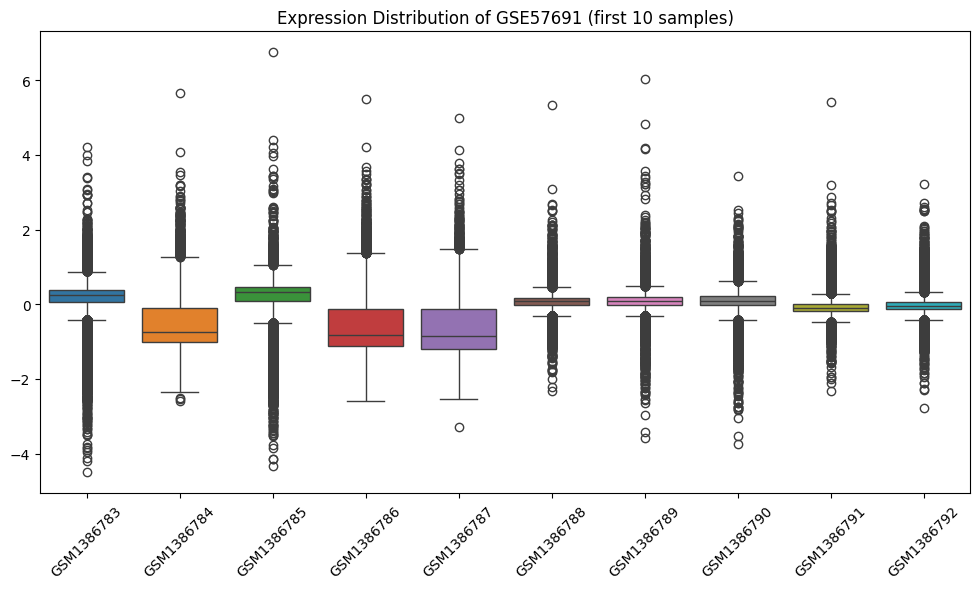

In [7]:
# Step 3: Basic exploratory analysis
# Example: Plot expression distribution across samples
plt.figure(figsize=(12, 6))
sns.boxplot(data=expr_df.iloc[:, :10])  # plot first 10 samples
plt.xticks(rotation=45)
plt.title(f"Expression Distribution of {gse_id} (first 10 samples)")
plt.show()




In [8]:
# Step 4: Differential expression (very basic t-test example)
from scipy.stats import ttest_ind

# Assume first half samples are "control", second half are "treated"
n = len(expr_df.columns)
control = expr_df.iloc[:, :n//2]
treated = expr_df.iloc[:, n//2:]

pvals = []
for gene in expr_df.index:
    stat, p = ttest_ind(control.loc[gene], treated.loc[gene], nan_policy="omit")
    pvals.append(p)

expr_df["pval"] = pvals
expr_df_sorted = expr_df.sort_values("pval").head(20)
print(expr_df_sorted)



              GSM1386783  GSM1386784  GSM1386785  GSM1386786  GSM1386787  \
ID_REF                                                                     
ILMN_1686235   -1.091753   -1.670417   -1.037198   -1.585605   -1.414788   
ILMN_1711729   -0.170393    2.831540    0.667382    2.802180    3.054578   
ILMN_1810387   -1.108852   -0.746591   -0.764790   -1.227105   -1.274110   
ILMN_1758846   -0.628468   -1.212174   -0.581191   -1.237880   -1.544391   
ILMN_1661646    0.584540    2.869013    1.748602    3.487677    1.734268   
ILMN_2077623    1.201871    1.568134    0.927091    1.926899    2.006494   
ILMN_1734833    0.901540    0.834696    0.630462    1.073026    0.501321   
ILMN_1733421    0.844473    1.946968    0.845844    1.891547    1.351578   
ILMN_1745852    0.485924    0.555134    0.712529    1.035027    0.223307   
ILMN_1813753    1.724000    2.455725    1.359668    2.165113    2.968011   
ILMN_1687743    0.773096    1.074145    0.735513    1.465684    1.161487   
ILMN_1771801

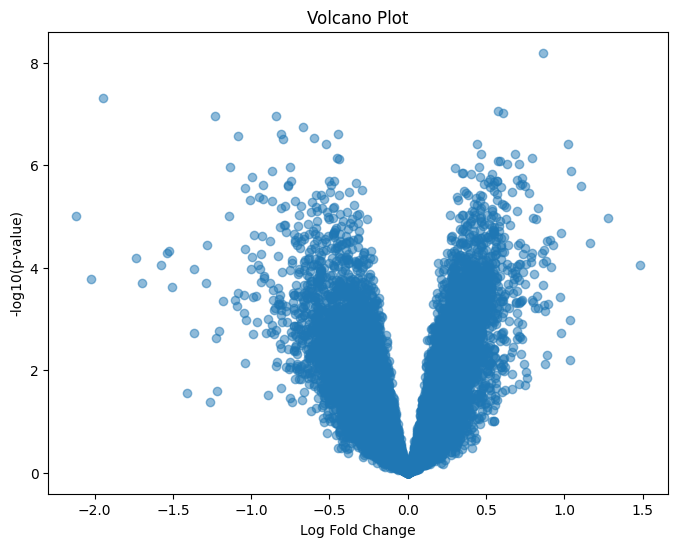

In [9]:
# Step 5: Volcano plot
import numpy as np

logFC = treated.mean(axis=1) - control.mean(axis=1)
expr_df["logFC"] = logFC
expr_df["-log10p"] = -np.log10(expr_df["pval"])

plt.figure(figsize=(8,6))
plt.scatter(expr_df["logFC"], expr_df["-log10p"], alpha=0.5)
plt.xlabel("Log Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot")
plt.show()